In [14]:
#Importing packages and csv files

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

allunits=pd.read_csv("allunits_puf_21.csv")

occupied=pd.read_csv("occupied_puf_21.csv")

person=pd.read_csv("person_puf_21.csv")

vacant=pd.read_csv("vacant_puf_21.csv")

In [15]:
#The next four cells are deleting unneeded columns

df = pd.DataFrame(allunits)
for col in df.columns:
    if 'FW' in col:
        del df[col]

In [16]:
df2 = pd.DataFrame(occupied)
for col in df2.columns:
    if 'FW' in col:
        del df2[col]

In [17]:
df3 = pd.DataFrame(person)
for col in df3.columns:
    if 'PW' in col:
        del df3[col]

In [18]:
df4 = pd.DataFrame(vacant)
for col in df4.columns:
    if 'FW' in col:
        del df4[col]

In [19]:
#Editing the person dataframe to show necessary columns


df3 = df3[['CONTROL', 'LNO', 'RELATION_P', 'AGE_REC_P', 'GENDER_P', 'MARITALSTAT_P', 'MOVENYC_P', 'EDNOW_P', 'TOTAL_INC_REC_P']]

df3["RELATION_P"] = df3["RELATION_P"].replace({0: "Respondent", 
                                               1: "Husband or wife", 
                                               2: "Unmarried partner", 
                                               3: "Child", 
                                               4: "Brother or sister (stepbrother or stepsister)", 
                                               5: "Father or mother", 
                                               6: "Father-in-law or mother-in-law", 
                                               7: "Grandchild", 
                                               8: "Grandparent", 
                                               9: "Other relative (cousin, nephew, etc)", 
                                               10: "Roommate or broader", 
                                               11: "Other non-relative"})

df3["GENDER_P"] = df3["GENDER_P"].replace({1: "Male", 
                                           2: "Female",
                                           3: "Other"})

df3["MARITALSTAT_P"] = df3["MARITALSTAT_P"].replace({-2: "Not applicable (not the respondent)",
                                                     -1: "Not reported",
                                                     1: "Married",
                                                     2: "Divorced",
                                                     3: "Separated",
                                                     4: "Widowed",
                                                     5: "Never Married"})

df3["MOVENYC_P"] = df3["MOVENYC_P"].replace({-2: "Not applicable (born in the New York City)",
                                             -1: "Not reported",
                                             1954: "Moved in 1954 or earlier"})

df3["EDNOW_P"] = df3["EDNOW_P"].replace({-2: "Not applicable (under 5 years old or not in school or college in the last three months)",
                                             -1: "Not reported",
                                             1: "1st to 6th grade",
                                             2: "7th to 9th grade",
                                             3: "10th to 12th grade",
                                             4: "GED program"})

df3["TOTAL_INC_REC_P"] = df3["TOTAL_INC_REC_P"].replace({-2222222222: "Not applicable (under 15 years old)",
                                                         -40000000: "-$40,000,000 (net income loss)",
                                                         0: "$0 (no income)",
                                                         1: "$1",
                                                         500000000: "$500,000,000"})

df3["TOTAL_INC_REC_P"] = df3["TOTAL_INC_REC_P"].apply(lambda x: f"${x:,}" if isinstance(x, int) else x)
df3

,CONTROL,LNO,RELATION_P,AGE_REC_P,GENDER_P,MARITALSTAT_P,MOVENYC_P,EDNOW_P,TOTAL_INC_REC_P
0,12100003,1,Respondent,64,Female,Never Married,Not applicable (born in the New York City),Not applicable (under 5 years old or not in sc...,"$2,000"
1,12100005,1,Respondent,88,Female,Widowed,Not reported,Not applicable (under 5 years old or not in sc...,"$3,696"
2,12100008,1,Respondent,48,Male,Never Married,2016,Not reported,"$20,160"
3,12100008,2,"Other relative (cousin, nephew, etc)",20,Male,Not applicable (not the respondent),Not applicable (born in the New York City),Not reported,"$20,120"
4,12100008,3,Other non-relative,38,Female,Not applicable (not the respondent),2016,Not reported,$0 (no income)
...,...,...,...,...,...,...,...,...,...
15580,12129988,3,Child,39,Male,Not applicable (not the respondent),1987,Not applicable (under 5 years old or not in sc...,"$1,000"
15581,12129999,1,Respondent,27,Female,Never Married,2018,Not applicable (under 5 years old or not in sc...,"$35,000"
15582,12129999,2,Unmarried partner,28,Male,Not applicable (not the respondent),2020,Not applicable (under 5 years old or not in sc...,"$65,000"
15583,12130000,1,Respondent,53,Female,Separated,Not applicable (born in the New York City),Not applicable (under 5 years old or not in sc...,"$1,950"


In [20]:
#Editing the occupied dataframe to show necessary columns

df2 = df2[['CONTROL', 'TENURE', 'HHSIZE', 'HHDONEPLUS', 'MOD_HAVE', 'GRENT']]

df2["TENURE"] = df2["TENURE"].replace({1: "Renter", 
                                        2: "Owner"})
df2["HHDONEPLUS"] = df2["HHDONEPLUS"].replace({
                                       -1: "Not reported", 
                                        1: "One or more people has one or more disability measured in the NYCHVS",
                                        2: "No person has any disability measured in the NYCHVS"})
df2["MOD_HAVE"] = df2["MOD_HAVE"].replace({-2: "Not applicable (no one in household reported any difficulty)", 
                                           -1: "Not reported", 
                                            1: "Received a modification",
                                            2: "Did not receive a modification"})

df2

,CONTROL,TENURE,HHSIZE,HHDONEPLUS,MOD_HAVE,GRENT
0,12100003,Renter,1,One or more people has one or more disability ...,Did not receive a modification,228
1,12100005,Renter,1,One or more people has one or more disability ...,Received a modification,1172
2,12100008,Renter,6,No person has any disability measured in the N...,Not applicable (no one in household reported a...,2655
3,12100010,Renter,3,No person has any disability measured in the N...,Not applicable (no one in household reported a...,1065
4,12100013,Renter,4,No person has any disability measured in the N...,Not applicable (no one in household reported a...,1319
...,...,...,...,...,...,...
7084,12129984,Renter,2,One or more people has one or more disability ...,Received a modification,-2
7085,12129988,Renter,3,No person has any disability measured in the N...,Not applicable (no one in household reported a...,909
7086,12129999,Renter,2,No person has any disability measured in the N...,Not applicable (no one in household reported a...,-1
7087,12130000,Renter,1,No person has any disability measured in the N...,Not applicable (no one in household reported a...,400


In [21]:
#Editing the vacant dataframe to show necessary columns

df4 = df4[['CONTROL', 'FIRSTOCC', 'REASON_NOTAVAIL', 'OWN', 'LASTRENT', 'VAC_LENGTH', 'ASKINGRENT', 'ASKINGPRICE']]


df4["FIRSTOCC"] = df4["FIRSTOCC"].replace({-1: "Not reported", 
                                        1: "First occupancy",
                                      2: "Previously occupied"})
df4["REASON_NOTAVAIL"] = df4["REASON_NOTAVAIL"].replace({-2: "Not Applicable (Unit Available for Rent and/or Sale)",
                                                         -1: "Not Reported",
                                                         1: "Rented or sold, not yet occupied",
                                                         2: "Awaiting or undergoing renovation",
                                                         3: "Held for occasional, seasonal, or recreational use",
                                                         4: "Additional reasons - one or more of the following: used or converted to non-residential use, in legal dispute, awaiting conversion or being converted to coop or condo, held pending sale of building, held for planned demolition, or owner’s personal problems",
                                                         5: "Held as vacant",
                                                         6: "Unit is dilapidated or otherwise uninhabitable",
                                                         7: "Held for other reasons",
                                                         8: "Two or more reasons reported"})
df4["OWN"] = df4["OWN"].replace({-2: "N/A",
                                 -1: "Not reported", 
                                  1: "Previous occupant was renter",
                                  2: "Previous occupant was owner"})

df4['LASTRENT'] = df4['LASTRENT'].replace({-2: 'N/A', -1: 'Not reported'})

df4["VAC_LENGTH"] = df4["VAC_LENGTH"].replace({-2: "Not applicable (Held for occasional use)",
                                               -1: "Not reported",
                                                1: "Less than one month",
                                                2: "1 to 2 months",
                                                3: "2 to 3 months",
                                                4: "3 to 6 months",
                                                5: "6 to 12 months",
                                                6: "12 months or longer"})

df4["ASKINGRENT"] = df4["ASKINGRENT"].replace({-2: "Not applicable (Unit is not available for rent)",
                                                1: "$1 to $1,499",
                                                2: "$1,500 to $2,299",
                                                3: "$2,300 to $3,099",
                                                4: "$3,100 to $3,899",
                                                5: "$3,900 or more"})

df4["ASKINGPRICE"] = df4["ASKINGPRICE"].replace({-2: "Not applicable (not available for sale)",
                                                  1: "$1 to $299,999",
                                                  2: "$300,000 to $599,999",
                                                  3: "$600,000 to $899,999",
                                                  4: "$900,000 or more"})

df4

,CONTROL,FIRSTOCC,REASON_NOTAVAIL,OWN,LASTRENT,VAC_LENGTH,ASKINGRENT,ASKINGPRICE
0,12100085,Previously occupied,Awaiting or undergoing renovation,Previous occupant was owner,Not reported,2 to 3 months,Not applicable (Unit is not available for rent),Not applicable (not available for sale)
1,12100093,Previously occupied,Held as vacant,Previous occupant was owner,1700,12 months or longer,"$1,500 to $2,299",Not applicable (not available for sale)
2,12100108,Previously occupied,Two or more reasons reported,Previous occupant was owner,0,12 months or longer,Not applicable (Unit is not available for rent),Not applicable (not available for sale)
3,12100132,Previously occupied,"Rented or sold, not yet occupied",Not reported,N/A,Not reported,Not applicable (Unit is not available for rent),Not applicable (not available for sale)
4,12100151,Previously occupied,Two or more reasons reported,Previous occupant was owner,550,12 months or longer,Not applicable (Unit is not available for rent),Not applicable (not available for sale)
...,...,...,...,...,...,...,...,...
1300,12129932,Previously occupied,"Rented or sold, not yet occupied",Previous occupant was owner,0,Less than one month,Not applicable (Unit is not available for rent),Not applicable (not available for sale)
1301,12129945,Previously occupied,Not Applicable (Unit Available for Rent and/or...,Previous occupant was owner,Not reported,1 to 2 months,"$3,900 or more",Not applicable (not available for sale)
1302,12129967,First occupancy,Two or more reasons reported,N/A,N/A,12 months or longer,Not applicable (Unit is not available for rent),Not applicable (not available for sale)
1303,12129973,Previously occupied,Awaiting or undergoing renovation,Previous occupant was owner,Not reported,3 to 6 months,Not applicable (Unit is not available for rent),Not applicable (not available for sale)


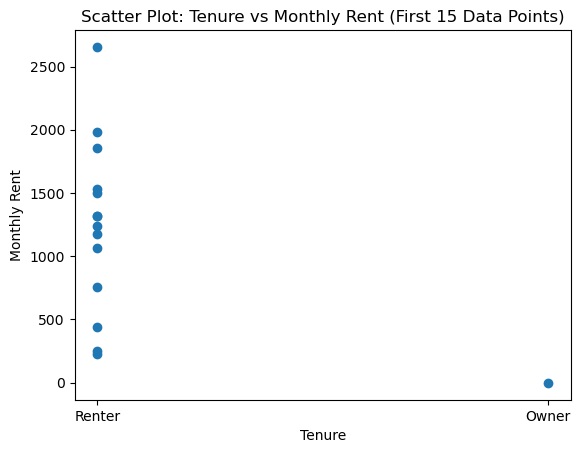

In [26]:
#Used to show the frequency of renters vs buyers and how much the monthly rent is.

df2_subset = df2[['TENURE', 'GRENT']].head(15)
plt.scatter(df2_subset['TENURE'], df2_subset['GRENT'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Rent')
plt.title('Scatter Plot: Tenure vs Monthly Rent (First 15 Data Points)')
plt.show()

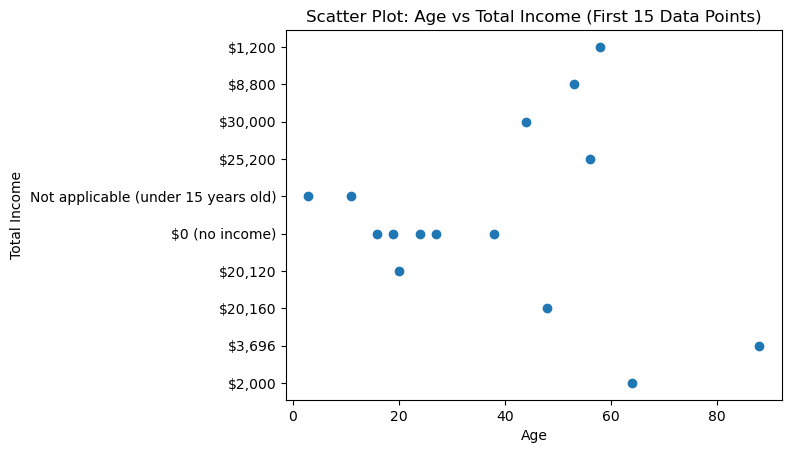

In [25]:
#Used to display and compare age and total income of the first 15 data points.

df3_subset = df3[['AGE_REC_P', 'TOTAL_INC_REC_P']].head(15)
plt.scatter(df3_subset['AGE_REC_P'], df3_subset['TOTAL_INC_REC_P'])
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.title('Scatter Plot: Age vs Total Income (First 15 Data Points)')
plt.show()